<a href="https://colab.research.google.com/github/A3Lab-UNIVPM/DL4SP_notebooks/blob/main/MNIST_classification_Tensorboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST tutorial with Tensorboard
This notebook is an example of multiclass classification of handwritten digits taken from the popular public dataset MNIST (http://yann.lecun.com/exdb/mnist/).
This guide uses tf.keras, a high-level API to build and train models in TensorFlow (https://www.tensorflow.org/), and TensorBoard (https://www.tensorflow.org/tensorboard), a tool for providing the measurements and visualizations needed during the machine learning workflow.

## Import libraries

In [ ]:
# TensorFlow (and tf.keras)
import tensorflow as tf

# Load the TensorBoard notebook extension
%load_ext tensorboard 
# python %magic command: to view all magic commands run %lsmagic
from tensorboard.plugins.hparams import api as hp

# Helper libraries
import datetime
import os
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import random as python_random
import sklearn.metrics
from sklearn.model_selection import train_test_split

In [ ]:
# Check libraries version (e.g., for running in local system with a code editor)
!python --version
print('Tensorflow version:', (tf.__version__))
print('NumPy version:', (np.__version__))
print('matplotlib version:', (matplotlib.__version__))
print('scikit-learn version:', (sklearn.__version__))

Python 3.7.12
Tensorflow version: 2.7.0
NumPy version: 1.19.5
matplotlib version: 3.2.2
scikit-learn version: 1.0.2


In [ ]:
# Reproducibility
np.random.seed(123)
python_random.seed(123)
tf.random.set_seed(1234)

## Create directories

In [ ]:
# Create project directory
if not os.path.exists('/mnist'):
  os.makedirs('/mnist')

In [ ]:
# Clear any logs from previous runs
!rm -rf /mnist/logs/
!rm -rf /mnist/model/

## Import the MNIST dataset
MNIST (“Modified National Institute of Standards and Technology”) is de facto the “Hello, World” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.
The MNIST dataset contains 70,000 grayscale images of handwritten digits in 10 categories (0, 1, 2, 3, 4, 5, 6, 7, 8, 9). The images show individual handwritten digits at low resolution (28 x 28 pixels), as seen here:

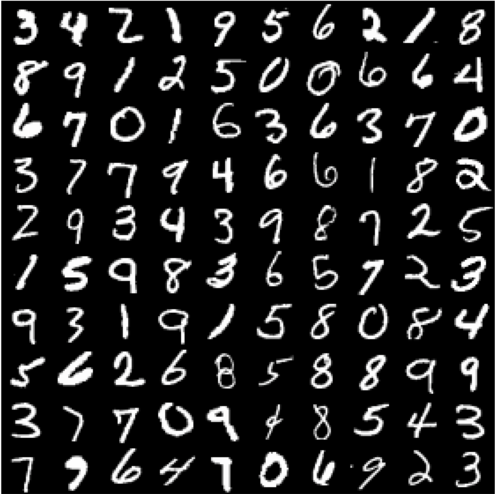

This dataset represents a good starting point to test and debug code because it is relatively small and is used to verify that an algorithm works as expected. 

In the original dataset, 60,000 images are used to train the network and 10,000 to evaluate how accurately the network classifies images. We can access the MNIST dataset directly from TensorFlow:

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set* — the data that the model uses to learn.
* The model is tested over the *test set*, composed of the `test_images` and `test_labels` arrays.

The images are 28 x 28 NumPy arrays with pixel values ranging from 0 to 255. The *labels* are represented by an array of integers ranging from 0 to 9. These correspond to the *class* of each image.

In [ ]:
# We define the class names in the following list from label 0 to label 9
class_names = {0: 'Zero', 1: 'One', 2: 'Two', 3: 'Three', 4: 'Four',
               5: 'Five', 6: 'Six', 7: 'Seven', 8: 'Eight', 9: 'Nine'}

## Explore the data
Let's explore the format of the dataset before training the model. The following shows that the training set is composed of 60,000 images, with each image represented as 28 x 28 pixels, and 60,000 labels, where each label is an integer between 0 and 9:

In [ ]:
print('train images shape: {}'.format(train_images.shape))
print('train labels shape: {}'.format(train_labels.shape))
train_labels

train images shape: (60000, 28, 28)
train labels shape: (60000,)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels, and the test set contains 10,000 images labels. Each label is an integer between 0 and 9, too.

In [ ]:
print('test images shape: {}'.format(test_images.shape))
print('test labels shape: {}'.format(test_labels.shape))
test_labels

test images shape: (10000, 28, 28)
test labels shape: (10000,)


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Now, we make a further split: we divide the training set into training and validation sets. We assign to the validation set a number of samples equal to 10,000.
A balanced split of the dataset assigns a percentage of 70% of the samples to the training set (`tr_images` and `tr_labels`), 15% to the validation set (`val_images` and `val_labels`), and the remaining 15% to the test set (`test_images` and `test_labels`).

In [ ]:
tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.16666, random_state=42)

In [ ]:
print('train images shape: {}'.format(tr_images.shape))
print('train labels shape: {}'.format(tr_labels.shape))
print('validation images shape: {}'.format(val_images.shape))
print('validation labels shape: {}'.format(val_labels.shape))

train images shape: (50000, 28, 28)
train labels shape: (50000,)
validation images shape: (10000, 28, 28)
validation labels shape: (10000,)


## Preprocess the data

The data must be preprocessed before training the network. Inspecting the image #1 in the training set, we can see that the pixel values fall in the range of 0 to 255:

The handwritten digit label is:  5 - Five

Pixel values are: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 121 121 240 253 218  95   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  23 107 107 114 240 253 252 252 252 252 198   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  61 232 252 252 252 252 253 252 252 252 252  79   0   0   0   0   0   0   0]
 [  0   0   0   0

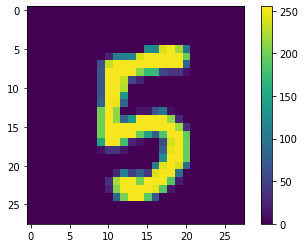

In [ ]:
plt.figure()
np.set_printoptions(linewidth=200)
plt.imshow(tr_images[1])
print('The handwritten digit label is: ', tr_labels[1], '-', class_names[tr_labels[1]])
print('\nPixel values are: \n', tr_images[1])
plt.imshow(tr_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

These values should be scaled to a range of 0 to 1 before feeding them to the neural network model. The normalization technique is required when features have different ranges. We make sure that the different features take on similar ranges of values so that gradient descents can converge more quickly. To do so, values are divided by 255. The *training/validation set* and the *test set* must be preprocessed in the same way.

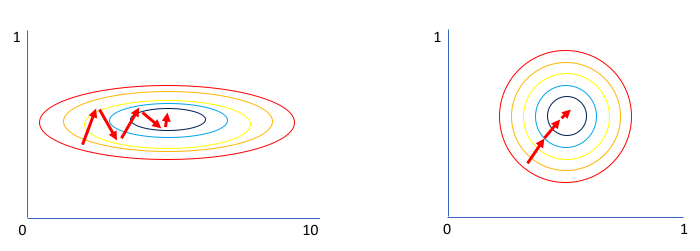

In [ ]:
tr_images = tr_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

We now display the pixel values after normalization.

The handwritten digit label is:  5 - Five

Pixel values after rescaling are: 
 [[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.47 0.47 0.94 0.99 0.85 0.37 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.09 0.42 0

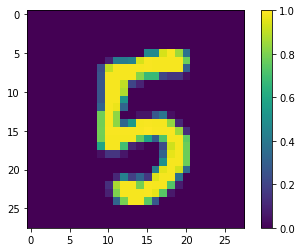

In [ ]:
plt.figure()
np.set_printoptions(linewidth=200, precision=2)
plt.imshow(tr_images[1])
print('The handwritten digit label is: ', tr_labels[1], '-', class_names[tr_labels[1]])
print('\nPixel values after rescaling are: \n', tr_images[1])
plt.imshow(tr_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

To verify that the data are in the correct format, we display the first 25 images from the *training set* and the class name below them.

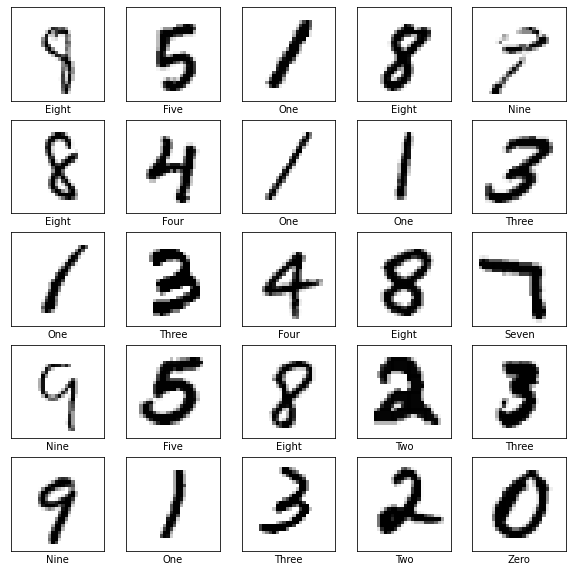

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tr_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[tr_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers, then compiling the entire model. One tip is to create an initial model based on a similar task, then we'll modify it according to the results obtained through optimization techniques.

###Set up the layers

We set a `tf.keras.models.Sequential` model.
The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 x 28 pixels) to a one-dimensional array (of 28 x 28 = 784 pixels). This layer can be considered unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected or fully-connected neural layers. The first Dense layer has 128 nodes (or neurons). The second and last layer returns a logits array with a length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

ReLU Applies the rectified linear unit activation function.
With default values, this returns the standard ReLU activation: max(x, 0), the element-wise maximum of 0 and the input tensor.

Softmax is an activation function that converts a vector of values to a probability distribution. The elements of the output vector are in range (0, 1) and sum to 1.

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(10, activation='softmax')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


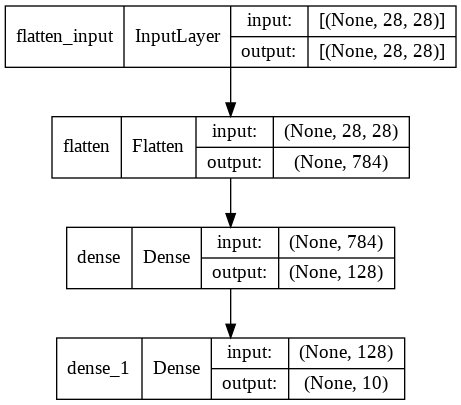

In [ ]:
dot_img_file = '/tmp/model.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

Definitions recap:

- *Sequential*: That defines a “sequence” of layers in the neural network.

- *Flatten*: Our images were a square when we printed them out. So, flatten takes that square and turns it into a 1-dimensional set.

- *Dense*: Adds a layer of neurons. Each layer of neurons needs an activation function to tell them what to do.

- *Relu* effectively means “If x>0 return x, else return 0” — so it only passes values equal to 0 or greater to the next layer of the network.

- *Softmax* takes a set of values and effectively picks the biggest one. So, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 0.4, 0.1, 0.05, 0.05, 0.05], it saves us from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0].

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* — It measures how accurate the model is during training. We want to minimize this function to “steer” the model in the right direction.
* *Optimizer* — This is how the model is updated based on the data it sees and its loss function.
* *Metrics* — It is used to monitor the training and testing steps. The following example uses *accuracy*, which represents the fraction of the images correctly classified.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Earlystopping
Callback which stops training when a monitored metric has stopped improving.

In [ ]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=10, mode='auto', 
                                         restore_best_weights=True)

## Train the model

The `model.fit` method starts the training phase. It is so-called because it “fits” the model to the training data. We set 100 epochs for the training with earlystopping (monitoring the validation accuracy).


In [ ]:
print('Start training')
history = model.fit(tr_images, 
                    tr_labels, 
                    batch_size=32, 
                    epochs=100, 
                    shuffle=True, 
                    validation_data=(val_images, val_labels),
                    callbacks=earlystopping,
                    verbose=1)
print('End training')

Start training
Epoch 1/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2784 - accuracy: 0.9202 - val_loss: 0.1609 - val_accuracy: 0.9522
Epoch 2/100
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1240 - accuracy: 0.9646 - val_loss: 0.1097 - val_accuracy: 0.9671
Epoch 3/100
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0867 - accuracy: 0.9744 - val_loss: 0.0913 - val_accuracy: 0.9709
Epoch 4/100
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0640 - accuracy: 0.9805 - val_loss: 0.0855 - val_accuracy: 0.9729
Epoch 5/100
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0493 - accuracy: 0.9846 - val_loss: 0.0845 - val_accuracy: 0.9749
Epoch 6/100
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0386 - accuracy: 0.9883 - val_loss: 0.0766 - val_accuracy: 0.9769
Epoch 7/100
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 

### Plot training and validation scores

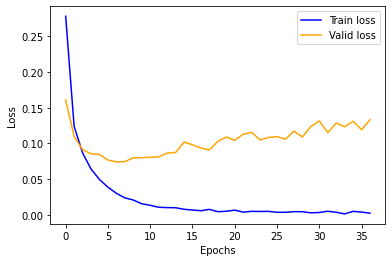

In [ ]:
plt.plot(history.history['loss'], label='Train loss', color='Blue')
plt.plot(history.history['val_loss'], label='Valid loss', color='Orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

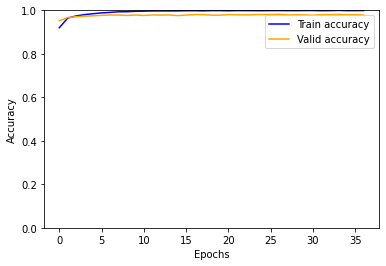

In [ ]:
plt.plot(history.history['accuracy'], label='Train accuracy', color='Blue')
plt.plot(history.history['val_accuracy'], label='Valid accuracy', color='Orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.axis(ymin=0, ymax=1)
plt.legend()
plt.show()

## Evaluate the model on test data
Now, the function `model.evaluate` is applied on the test set, composed of handwritten digits unseen during the training. The computation is based on the comparison between true labels and predicted labels and returns the test accuracy as output.

In [ ]:
print('Start evaluation on test set')
test_loss, test_acc = model.evaluate(test_images, test_labels, batch_size=1, verbose=1)
print('End evaluation on test set')
print('\nTest accuracy with 128 units:', test_acc)

Start evaluation on test set
10000/10000 [==============================] - 19s 2ms/step - loss: 0.1104 - accuracy: 0.9786
End evaluation on test set

Test accuracy with 128 units: 0.978600025177002


In this case, the accuracy is about 0.97, which means it is 97% accurate. As expected, it probably would not do as well with *unseen* data as it did with data it was trained on!

### Visualize predictions
We can just compute the prediction array.
The model returns linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). A softmax layer converts the logits to probabilities, which are easier to interpret. 

Here, the the function `model.predict` returns the prediction array for each image in the test set:

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

 A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different handwritten digits. 
 
We can see which label has the highest confidence value for the first image [0] in the test set:

In [ ]:
print("The prediction array for the first test image is:", predictions[0])
print("The max value is at position:", np.argmax(predictions[0]))

The prediction array for the first test image is: [0.09 0.09 0.09 0.09 0.09 0.09 0.09 0.23 0.09 0.09]
The max value is at position: 7


So, the model is most confident that this image depicts a `7`. Examining the true label, it shows that the classification is correct:

In [ ]:
test_labels[0]

7

The following function allows us to look at the full set of 10 class predictions:

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0-th image, its class prediction, and its prediction array. If the prediction label is correct the plot is blue, otherwise it is red. The number gives the percentage (out of 100) for the predicted label.

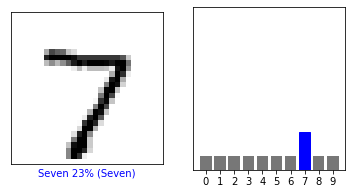

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

Now, we show another randomly chosen handwritten digit and its class prediction:

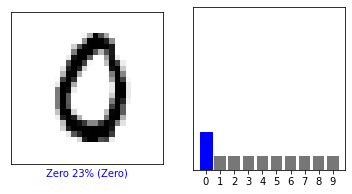

In [ ]:
i = 1001
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot 15 images with their predictions. Note that the model could be wrong even when it is very confident.

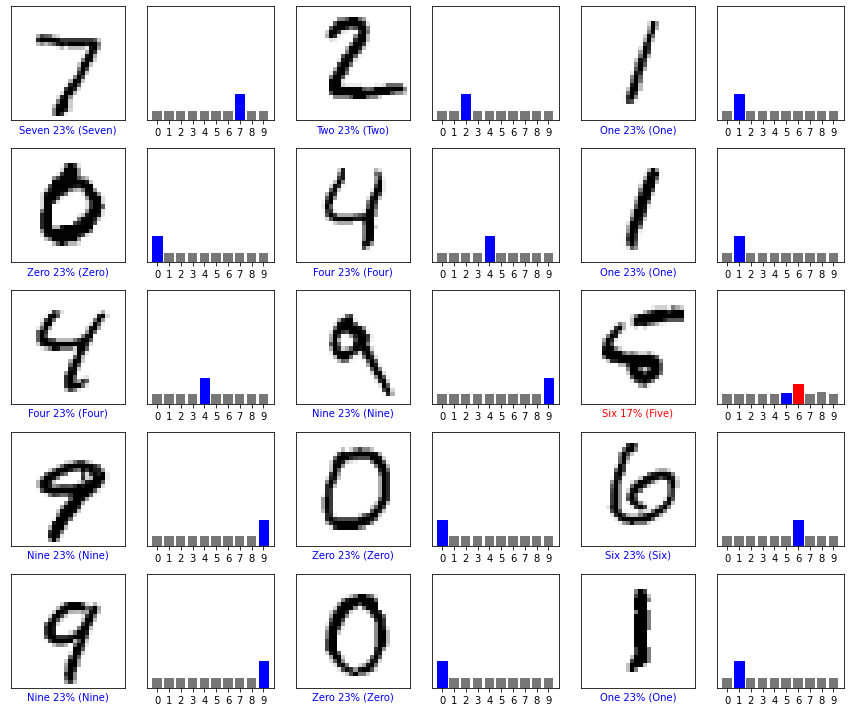

In [ ]:
# Plot the first 15 test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Tensorboard Callback (hyperparameters optimization)
Machine learning invariably involves understanding key metrics such as loss and how they change as training progresses. Metrics help understanding if the model is overfitted, for example, or if it is unnecessarily trained for too long. They also can be compared across different training runs to debug and improve the model.

This tutorial will focus on the following steps:
* the setting of TensorBoard's Scalars Dashboard allows us to visualize accuracy and loss curves;
* the setting of TensorBoard's HParams dashboard provides several tools to help with this process of identifying the best experiment or most promising sets of hyperparameters. 

Now, we set up a model such that we can set different values for the following hyperparameters:
* number of hidden units;
* dropout rate;
* optimizer function.


In [ ]:
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([256, 512]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.0, 0.2))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'Nadam']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('/mnist/logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

We adopt TensorFlow runs to log hyperparameters and metrics. The training code is the same as the previous example, although the hyperparameters are no longer hardcoded. Instead, the hyperparameters are provided in an hparams dictionary and used throughout the training function.

In [ ]:
# We define a training/validation and evaluation function, depending of the set of hparams.
def train_val_model(hparams):
  # tf.keras.models.Sequential
  model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation='relu'),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(10, activation='softmax'),
  ])

  # model.compile
  model.compile(
      optimizer=hparams[HP_OPTIMIZER],
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'],
  )

  # We define the subdirectory to save different training runs
  logdir = os.path.join('/mnist/logs', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

  # We define Tensorboard callback
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)
  # We define the ModelCheckpoint callback (the best model is saved for each execution)
  modelcheckpoint = tf.keras.callbacks.ModelCheckpoint('/mnist/model/', 
                                                       monitor='val_accuracy', verbose=1, save_best_only=True)
  # We define the EarlyStopping (stop training when a monitored metric has stopped improving)
  earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=10, mode='auto', 
                                         restore_best_weights=True)
  
  # model.fit
  model.fit(tr_images, tr_labels, batch_size=32,
            epochs=100, shuffle=True, validation_data=(val_images, val_labels),
            callbacks=[tensorboard_callback, modelcheckpoint, earlystopping], verbose=1)
  
  # model.evaluate
  _, accuracy = model.evaluate(test_images, test_labels, verbose=1)

  # We save weights for each execution
  h5_save_weights_path = '/mnist/model/mnist_' + run_name + '.h5'
  model.save_weights(h5_save_weights_path)

  return accuracy

For each run, a hparams summary is registered reporting the hyperparameters and final accuracy:

In [ ]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_val_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

We can try multiple experiments, training each one with a different set of hyperparameters.

For simplicity, we use a grid search: all combinations of the discrete parameters and the lower and upper bounds of the real-valued parameter are tried in training. For more complex scenarios, it might be more effective to choose each hyperparameter value randomly (this is called a random search). There are more advanced methods which can be used.

In [ ]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
  for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
    for optimizer in HP_OPTIMIZER.domain.values:
      hparams = {
          HP_NUM_UNITS: num_units,
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
      }

      run_name = 'run-%d' % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('/mnist/logs/hparam_tuning' + run_name, hparams)
      session_num += 1

We can visualize the results in TensorBoard's HParams plugin.

In [ ]:
%tensorboard --logdir /mnist/logs

### Evaluate accuracy on test data

We recap the structure of the model that provided the best results. We first review the accuracy and prediction values on the already tested data.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Bypass training phase and load weights from h5 file
h5_load_weights_path = '/mnist/model/mnist_run-2.h5'
model.load_weights(h5_load_weights_path) 

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, batch_size=1, verbose=1)
print('\nTest accuracy:', test_acc)

### Visualize predictions
We compute and display some predictions as in the previous example.

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

Let's take a look at the 1500-th prediction:

In [ ]:
print("The prediction array of the 1500-th image is:", predictions[1500])
print("The model is most confident that the 1500-th image corresponds to:", np.argmax(predictions[1500]))
print("The true label of the 1500-th image is:", test_labels[1500])

The prediction array of the 1500-th image is: [0.09 0.1  0.09 0.18 0.09 0.09 0.09 0.1  0.09 0.09]
The model is most confident that the 1500-th image corresponds to: 3
The true label of the 1500-th image is: 7


The following function allows us to look at the full set of 10 class predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

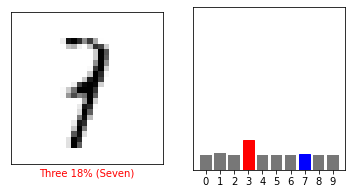

In [ ]:
i = 1500
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Now, we show another randomly chosen handwritten digit and its class prediction:

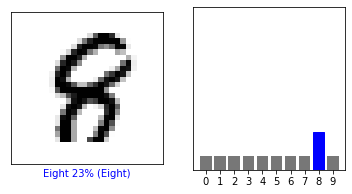

In [ ]:
i = 2800
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot 25 images with their predictions. Note that the model could be wrong even when it is very confident.

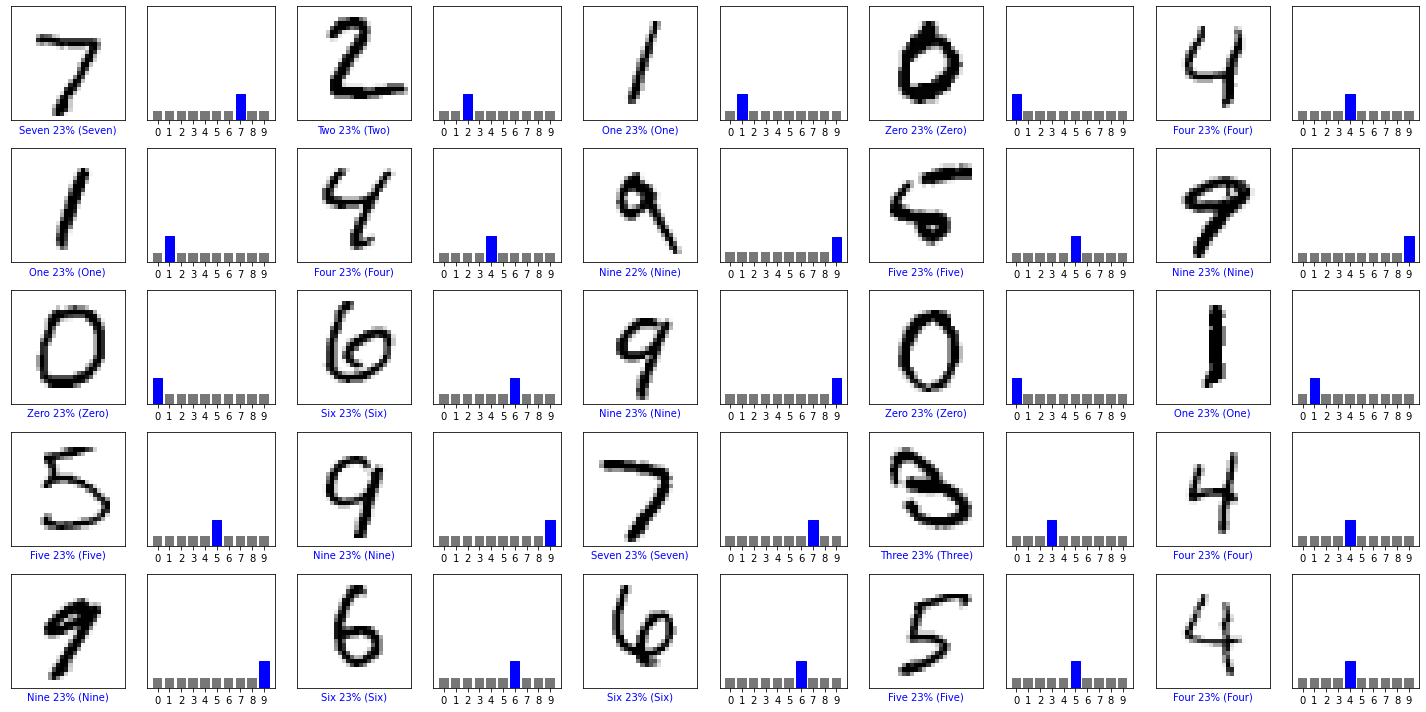

In [ ]:
# Plot the first 25 test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()